### Checking dataset Ratings

In [50]:
import pandas as pd

ratings = pd.read_csv('dataset/ml-latest-small/ratings.csv')
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### What values ​​exist in the rating column?

In [51]:
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#### How many values ​​of each type are there in the rating column?

In [52]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

#### Calculating the average of all values ​​in the rating column

In [53]:
ratings['rating'].mean()

3.501556983616962

#### Calculating the median of all values ​​in the rating column

In [54]:
ratings['rating'].median()

3.5

#### Ratings column general summary

In [55]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

##### From the above result, we can conclude that 25% of the movie ratings in the dataset are less than 3.0

#### Plotting the histogram of the ratings column

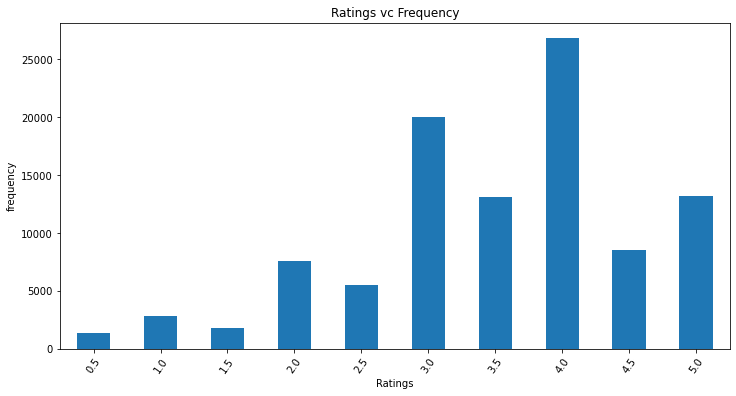

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt1 = ratings.rating.value_counts().sort_index().plot(kind = 'bar', rot = 55)
plt.title('Ratings vc Frequency')
plt1.set(xlabel = 'Ratings', ylabel='frequency')
plt.show()

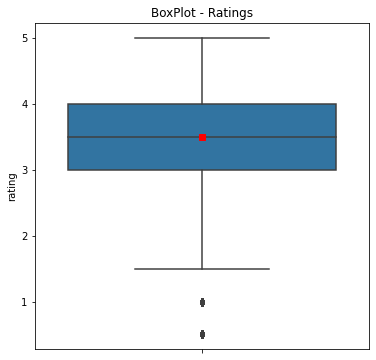

In [57]:
plt.figure(figsize = (6,6))
plt.title('BoxPlot - Ratings')
sns.boxplot(y = ratings.rating, 
            showmeans = True, 
            meanprops = {"marker":"s","markerfacecolor":"red", "markeredgecolor":"red"})

plt.show()

##### Conclusion: half of the people gave ratings between 3 and 4, 25% gave ratings between 4 and 5, that at least 25% of the ratings are between 1.5 and 3, and that ratings 1 and 0.5 (which are outliers) occur rarely compared to the other notes

##### Outliers indicate possible outliers.

### Checking dataset Movies

In [58]:
import pandas as pd

movies = pd.read_csv('dataset/ml-latest-small/movies.csv')
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Average rating Jumanji movie

In [59]:
ratings.query('movieId == 2').rating.mean()

3.4318181818181817

#### Plotting the boxplot of the first 5 films rating

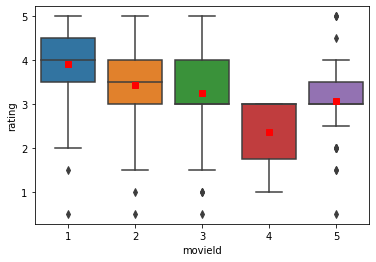

In [60]:
import seaborn as sns

sns.boxplot(x = 'movieId' , y = 'rating' , 
            data = ratings.query('movieId in [1,2,3,4,5]'),
            showmeans = True, 
            meanprops = {"marker":"s","markerfacecolor":"red", "markeredgecolor":"red"})

#### Calculating standard deviation
##### The standard deviation (standard deviation) is a parameter that indicates how far the data in the set are far from a central trend (median, mean, mode).
##### Shows how dispersed or condensed a distribution is.

In [61]:
print(ratings.query('movieId == 1').rating.std())
print(ratings.query('movieId == 2').rating.std())
print(ratings.query('movieId == 3').rating.std())
print(ratings.query('movieId == 4').rating.std())
print(ratings.query('movieId == 5').rating.std())

0.8348591407114047
0.8817134921476455
1.0548226531330251
0.8521681032463466
0.9071475440448851


#### Calculing the average of all movies of dataset

In [62]:
# group by feature movieId
a = ratings.groupby('movieId')
# calculating the average of agrouping
movie_means = a.rating.mean()
# showing 5 firsts movies 
movie_means.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

#### Plotting histogram and boxplot of average of all rating movie

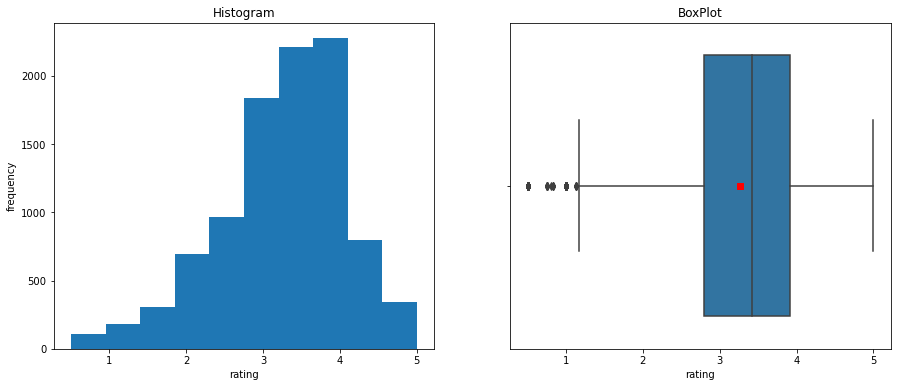

In [63]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt1 = movie_means.plot(kind = 'hist')
plt.title('Histogram')
plt1.set(ylabel = 'frequency', xlabel='rating')

plt.subplot(1,2,2)
plt2 = sns.boxplot(movie_means,
        showmeans = True, 
        meanprops = {"marker":"s","markerfacecolor":"red", "markeredgecolor":"red"})
plt.title('BoxPlot')
plt2.set(xlabel = 'rating')

plt.show()

##### Conclusion: the distribution of average rating is in between 2.8 to 3.9

### Analysing language of movies

In [64]:
movies_tmdb = pd.read_csv('dataset/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
movies_tmdb .original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

#### Counting how much to each language

In [65]:
count_language = movies_tmdb.original_language.value_counts().to_frame().reset_index() # converting to dataframe
count_language.columns = ["original_language","frequency"] # changing column names
count_language.head()

,original_language,frequency
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


#### Plotting Histogram to number of movies to each language

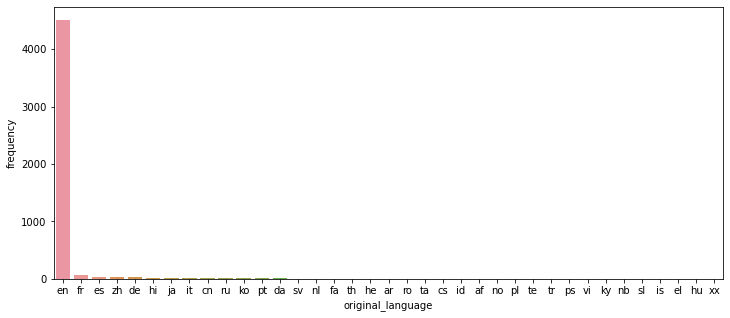

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 5))
sns.barplot(x = 'original_language' , y = 'frequency' , data = count_language)

In [67]:
#### Isolating english language

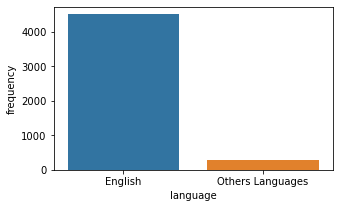

In [68]:
total_for_language = movies_tmdb.original_language.value_counts()
total = total_for_language.sum() # numbel total of movies
en_total = total_for_language.loc['en'] # number total of movies with english language
rest_total = total - en_total # number total of movies with language diff english

data = pd.DataFrame(
    {
        'language' : ['English','Others Languages'],
        'frequency': [en_total,rest_total]
    }
)

plt.figure(figsize = (5, 3))
sns.barplot(x = 'language' , y = 'frequency' , data = data)

#### Conclusion: english language is extremely predominant